# Final Project

## Step1 Reading data

You can use Kaggle API download the data

In [ ]:
'''
import kagglehub

# Download latest version
path = kagglehub.dataset_download("logiccraftbyhimanshi/e-commerce-analytics-swiggy-zomato-blinkit")

print("Path to dataset files:", path)
'''

Or use Google Drive upload data

In [1]:
import os

from google.colab import drive
Drive = drive.mount('/content/drive')

print("Connected")

Mounted at /content/drive
Connected


In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Ecommerce_Delivery_Analytics_New.csv')
print(df.head())


    Order ID Customer ID Platform Order Date & Time  Delivery Time (Minutes)  \
0  ORD000001    CUST2824  JioMart           19:29.5                       30   
1  ORD000002    CUST1409  Blinkit           54:29.5                       16   
2  ORD000003    CUST5506  JioMart           21:29.5                       25   
3  ORD000004    CUST5012  JioMart           19:29.5                       42   
4  ORD000005    CUST4657  Blinkit           49:29.5                       30   

      Product Category  Order Value (INR)              Customer Feedback  \
0  Fruits & Vegetables                382  Fast delivery, great service!   
1                Dairy                279            Quick and reliable!   
2            Beverages                599      Items missing from order.   
3            Beverages                946      Items missing from order.   
4            Beverages                334  Fast delivery, great service!   

   Service Rating Delivery Delay Refund Requested  
0         

In [ ]:
print(df.info())

📌 Overview  
This dataset provides detailed insights into e-commerce grocery delivery services, focusing on Blinkit, Swiggy Instamart, and JioMart. It includes customer feedback, delivery times, service ratings, and various factors affecting delivery performance. This dataset is useful for analyzing customer satisfaction, identifying service trends, and optimizing delivery logistics.

📊 Key Features  
📍 Order ID – Unique identifier for each order.  
📍 Platform – The e-commerce platform (Blinkit, Swiggy Instamart, JioMart).  
📍 Order Date & Time – Timestamp of when the order was placed.  
📍 Delivery Time (Minutes) – Time taken for order delivery.  
📍 Customer Feedback – Text-based feedback provided by the customer.  
📍 Service Rating (1-5) – Customer rating for delivery service.  
📍 Delivery Distance (km) – Distance covered by the delivery agent.  
📍 Payment Method – Mode of payment (Cash, UPI, Card, Wallet).  
📍 Order Value (INR) – Total value of the order in Indian Rupees.  
📍 Discount Applied (INR) – Discount provided on the order.  
📍 Delivery Charges (INR) – Charges applied for delivery.  
📍 Order Status – (Delivered, Cancelled, Delayed, etc.).

📈 Potential Use Cases  
✅ Customer Sentiment Analysis – Understand feedback trends and satisfaction levels.  
✅ Delivery Time Optimization – Identify patterns affecting delivery speed.  
✅ Platform Comparison – Compare performance across Blinkit, Swiggy Instamart, and JioMart.  
✅ Sales and Revenue Insights – Analyze trends in order value, discounts, and payment methods.  
✅ Predictive Analysis – Forecast delivery delays and customer preferences.

🛠️ Suggested Visualizations  
🎯 Histogram of delivery times to analyze service efficiency.  
🎯 Bar Chart showing average delivery time per platform.  
🎯 Heatmap to identify peak ordering times.  
🎯Word Cloud for customer feedback insights.

## Step2 Processing data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

### 1. Basic Statistical Analysis

In [ ]:
df = df.sort_values(by=['Customer ID', 'Order ID'], ascending=[True, True])
print(df.head(6))

        Order ID Customer ID Platform Order Date & Time  \
10738  ORD010739    CUST1000  JioMart           28:29.5   
14320  ORD014321    CUST1000  Blinkit           52:29.5   
18372  ORD018373    CUST1000  JioMart           06:29.5   
27264  ORD027265    CUST1000  JioMart           13:29.5   
27523  ORD027524    CUST1000  Blinkit           10:29.5   
46531  ORD046532    CUST1000  JioMart           55:29.5   

       Delivery Time (Minutes)     Product Category  Order Value (INR)  \
10738                       29        Personal Care                444   
14320                       27              Grocery                375   
18372                       17            Beverages                412   
27264                       31               Snacks                477   
27523                       27  Fruits & Vegetables                472   
46531                       28            Beverages                878   

                                Customer Feedback  Service Rating  

In [ ]:
print(f"Total orders: {len(df)}")
print(f"Average order value: {df['Order Value (INR)'].mean():.2f} INR")
print(f"Median order value: {df['Order Value (INR)'].median():.2f} INR")

Total orders: 100000
Average order value: 590.99 INR
Median order value: 481.00 INR


In [ ]:
# Platform analysis
platform_stats = df.groupby('Platform').agg({
    'Order ID': 'count',
    'Order Value (INR)': ['mean', 'sum'],
    'Delivery Time (Minutes)': 'mean'
}).sort_values(('Order ID', 'count'), ascending=False)
print("\nPlatform order statistics:")
print(platform_stats)


Platform order statistics:
                 Order ID Order Value (INR)           Delivery Time (Minutes)
                    count              mean       sum                    mean
Platform                                                                     
Swiggy Instamart    33449        592.902150  19831984               29.499925
Blinkit             33424        589.548947  19705084               29.474898
JioMart             33127        590.526519  19562372               29.634498


In [ ]:
%%capture
!pip install pandasql # Install the pandasql library

Using SQL to process raw data

In [ ]:
# Using SQL
from pandasql import sqldf

# Platform analysis
platform_stats_sql = """
SELECT
    Platform,
    COUNT("Order ID") as order_count,
    AVG("Order Value (INR)") as avg_order_value,
    SUM("Order Value (INR)") as total_order_value,
    AVG("Delivery Time (Minutes)") as avg_delivery_time
FROM df
GROUP BY Platform
ORDER BY order_count DESC
"""

platform_stats = sqldf(platform_stats_sql, locals())
print("\nPlatform order statistics (SQL):")
print(platform_stats)


Platform order statistics (SQL):
           Platform  order_count  avg_order_value  total_order_value  \
0  Swiggy Instamart        33449       592.902150           19831984   
1           Blinkit        33424       589.548947           19705084   
2           JioMart        33127       590.526519           19562372   

   avg_delivery_time  
0          29.499925  
1          29.474898  
2          29.634498  


In [ ]:
rfm_sql = """
WITH rfm_data AS (
    SELECT
        "Customer ID",
        COUNT("Order ID") as Frequency,
        SUM("Order Value (INR)") as Monetary,
        (JULIANDAY('now') - JULIANDAY(MAX("Order Date & Time"))) as Recency
    FROM df
    GROUP BY "Customer ID"
)
SELECT
    "Customer ID",
    Recency,
    Frequency,
    Monetary,
    NTILE(5) OVER (ORDER BY Recency DESC) as R_Score,
    NTILE(5) OVER (ORDER BY Frequency) as F_Score,
    NTILE(5) OVER (ORDER BY Monetary) as M_Score
FROM rfm_data
"""

rfm_result = sqldf(rfm_sql, locals())
print("\nRFM Analysis (SQL):")
print(rfm_result.head())


RFM Analysis (SQL):
  Customer ID Recency  Frequency  Monetary  R_Score  F_Score  M_Score
0    CUST1239    None          2       671        1        1        1
1    CUST5242    None          2       764        1        1        1
2    CUST8830    None          2       813        1        1        1
3    CUST2378    None          2       884        1        1        1
4    CUST7197    None          2       898        1        1        1


Normalize Data to 3NF

In [ ]:
# Create normalized table structures
def normalize_to_3nf(df):
    # Customer table
    customers = df[['Customer ID']].drop_duplicates().reset_index(drop=True)

    # Orders table
    orders = df[['Order ID', 'Customer ID', 'Platform', 'Order Value (INR)',
                'Delivery Time (Minutes)', 'Service Rating', 'Delivery Delay',
                'Refund Requested']].copy()

    # Product category table
    products = df[['Product Category']].drop_duplicates().reset_index(drop=True)

    # Order-Product relationship table
    order_products = df[['Order ID', 'Product Category']].copy()

    return customers, orders, products, order_products

# Apply 3NF normalization
customers_3nf, orders_3nf, products_3nf, order_products_3nf = normalize_to_3nf(df)

print("\n3NF Normalized Tables:")
print("Customers table:", customers_3nf.shape)
print("Orders table:", orders_3nf.shape)
print("Products table:", products_3nf.shape)
print("Order-Products table:", order_products_3nf.shape)



3NF Normalized Tables:
Customers table: (9000, 1)
Orders table: (100000, 8)
Products table: (6, 1)
Order-Products table: (100000, 2)


Analysis using DuckDB

In [ ]:
import duckdb

# Create DuckDB connection
conn = duckdb.connect()

# Register DataFrame as DuckDB table
conn.register('ecommerce_df', df)

# Execute complex query
duckdb_query = """
SELECT
    Platform,
    "Product Category",
    AVG("Order Value (INR)") as avg_order_value,
    AVG("Delivery Time (Minutes)") as avg_delivery_time,
    AVG("Service Rating") as avg_rating,
    COUNT(*) as order_count
FROM ecommerce_df
GROUP BY Platform, "Product Category"
ORDER BY order_count DESC
"""

# Fetch results as DataFrame and print
result = conn.execute(duckdb_query).fetchdf()
print("\nDuckDB Analysis Results:")
print(result)


DuckDB Analysis Results:
            Platform     Product Category  avg_order_value  avg_delivery_time  \
0            Blinkit                Dairy       451.462874          29.512493   
1   Swiggy Instamart        Personal Care      1050.442137          29.336528   
2   Swiggy Instamart                Dairy       452.377754          29.579247   
3            JioMart              Grocery       846.827297          29.728992   
4   Swiggy Instamart               Snacks       271.959636          29.552599   
5            Blinkit            Beverages       547.812087          29.574647   
6            JioMart                Dairy       450.579126          29.590584   
7            Blinkit              Grocery       847.028643          29.448264   
8            Blinkit  Fruits & Vegetables       376.239598          29.276004   
9            Blinkit               Snacks       273.793457          29.269818   
10           JioMart  Fruits & Vegetables       374.186260          29.729715   
11

### 2. Customer Behavior Analysis

In [ ]:
# Category analysis
category_stats = df.groupby('Product Category').agg({
    'Order ID': 'count',
    'Order Value (INR)': ['mean', 'sum']
}).sort_values(('Order ID', 'count'), ascending=False)
print("\nProduct category statistics:")
print(category_stats)


Product category statistics:
                    Order ID Order Value (INR)          
                       count              mean       sum
Product Category                                        
Dairy                  16857        451.475470   7610522
Grocery                16737        848.064468  14194055
Snacks                 16705        273.335887   4566076
Fruits & Vegetables    16632        375.572210   6246517
Beverages              16536        549.508285   9086669
Personal Care          16533       1052.174499  17395601


Because we found that the original data had textual features, we needed to convert them into numerical features according to the semantics. Value 1 represents positive feedbacks, while 0 means negative feedbacks.


In [ ]:
%%capture
'''
!pip install transformers
!pip install torch
import pandas as pd
from transformers import pipeline
from tqdm import tqdm
import torch

# Check if GPU is available
device = 0 if torch.cuda.is_available() else -1  # 0:GPU，-1:CPU
print(f"Using device: {'GPU' if device == 0 else 'CPU'}")


# Load model to GPU
classifier = pipeline(
    "sentiment-analysis",
    model="distilbert-base-uncased-finetuned-sst-2-english",
    device=device  # GPU
)

# Define classifiction function
def classify_text(text):
    if pd.isna(text):  # NA values
        return "Neutral"
    try:
        result = classifier(text[:512])  # 512 token
        label = result[0]["label"]
        return "1" if label == "POSITIVE" else "0"  # 1=positive, 0=nagative
    except Exception as e:
        print(f"Error processing text: {text[:50]}... Error: {str(e)}")
        return "Error"

# Show progress
tqdm.pandas(desc="progress")
df["Sentiment"] = df["Customer Feedback"].progress_apply(classify_text)

# Save result
df.to_csv("Ecommerce_With_Sentiment_GPU.csv", index=False)

# Check result
print("\nFinal result:")
print(df["Sentiment"].value_counts())
'''

In [ ]:
'''
import pandas as pd
from transformers import pipeline
from tqdm import tqdm
import torch

# Check if GPU is available
device = 0 if torch.cuda.is_available() else -1  # 0:GPU, -1:CPU
print(f"Using device: {'GPU' if device == 0 else 'CPU'}")

# Load a 3-class sentiment model
classifier = pipeline(
    "sentiment-analysis",
    model="cardiffnlp/twitter-roberta-base-sentiment",  # 3-class model
    device=device
)

# Define classification function
def classify_text(text):
    if pd.isna(text) or str(text).strip() == "":  # Handle NA/empty
        return "1"  # Neutral

    try:
        result = classifier(text[:512])  # Limit to 512 tokens
        label = result[0]["label"]

        if label == "LABEL_2":  # Positive
            return "2"
        elif label == "LABEL_1":  # Neutral
            return "1"
        else:  # Negative (LABEL_0)
            return "0"
    except Exception as e:
        print(f"Error processing text: {text[:50]}... Error: {str(e)}")
        return "1"  # Default to neutral on error

# Apply sentiment analysis
tqdm.pandas(desc="Processing sentiment")
df["Sentiment"] = df["Customer Feedback"].progress_apply(classify_text)

# Save & check results
df.to_csv("Ecommerce_With_3Sentiment_GPU.csv", index=False)
print("\nFinal sentiment distribution:")
print(df["Sentiment"].value_counts())
print("\n2 = Positive, 1 = Neutral, 0 = Negative")
'''


In [ ]:
#df_new = pd.read_csv('/content/drive/MyDrive/Ecommerce_With_3Sentiment_GPU.csv')
import pandas as pd  # Ensure pandas is imported correctly

#df_new = pd.read_csv('/content/drive/MyDrive/Ecommerce_With_3Sentiment_GPU.csv')
df_new = pd.read_csv('/content/drive/MyDrive/Ecommerce_With_Sentiment_GPU.csv')  # Access the read_csv function using pd.read_csv
unique_sentiments = df_new['Sentiment'].unique()
print(f"Unique values in 'Sentiment' column:\n{unique_sentiments}")
print(f"\nNumber of unique sentiment values: {len(unique_sentiments)}")

Unique values in 'Sentiment' column:
[1 0]

Number of unique sentiment values: 2


In [ ]:
# Customer purchase frequency
customer_order_count = df['Customer ID'].value_counts()
print("\nCustomer purchase frequency statistics:")
print(customer_order_count.describe())

# High-value customer identification (top 20%)
high_value_threshold = df['Order Value (INR)'].quantile(0.8)
high_value_customers = df[df['Order Value (INR)'] > high_value_threshold]['Customer ID'].unique()
print(f"\nNumber of high-value customers: {len(high_value_customers)}")


Customer purchase frequency statistics:
count    9000.000000
mean       11.111111
std         3.328830
min         2.000000
25%         9.000000
50%        11.000000
75%        13.000000
max        26.000000
Name: count, dtype: float64

Number of high-value customers: 8062


### 3. Service Quality Analysis

In [ ]:
# Delivery time analysis
print("\nDelivery time statistics:")
print(df['Delivery Time (Minutes)'].describe())

# Delivery delay analysis
delay_stats = df['Delivery Delay'].value_counts(normalize=True) * 100
print("\nDelivery delay percentage:")
print(delay_stats)

# Service rating analysis
print("\nService rating distribution:")
print(df['Service Rating'].value_counts().sort_index())



Delivery time statistics:
count    100000.000000
mean         29.536140
std           9.958933
min           5.000000
25%          23.000000
50%          30.000000
75%          36.000000
max          76.000000
Name: Delivery Time (Minutes), dtype: float64

Delivery delay percentage:
Delivery Delay
No     86.328
Yes    13.672
Name: proportion, dtype: float64

Service rating distribution:
Service Rating
1    15267
2    30552
3     7704
4     7789
5    38688
Name: count, dtype: int64


### 4. Visualization Analysis

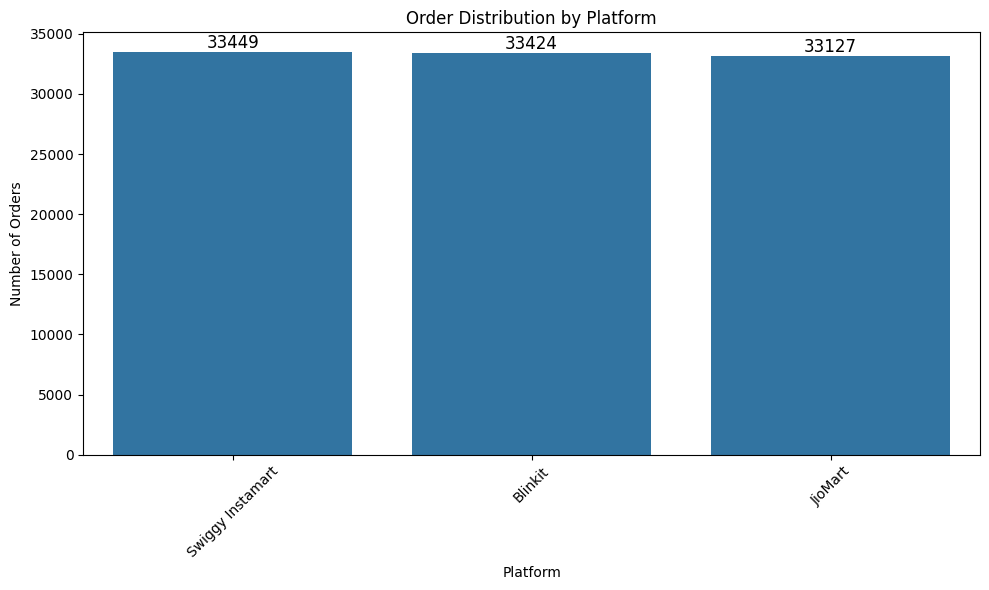

In [ ]:
# Platform order distribution
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='Platform', order=df['Platform'].value_counts().index)
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=12, color='black')
plt.title('Order Distribution by Platform')
plt.xlabel('Platform')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('platform_order_distribution.png')
plt.show()

#### Platform-wise Order Distribution

This bar chart shows the total number of orders placed across the three delivery platforms in the dataset: **Swiggy Instamart**, **Blinkit**, and **JioMart**. Each bar is annotated with the count of orders, allowing for direct comparison of platform usage volume.

**Findings:**
- All three platforms have nearly equal representation, each contributing roughly one-third of the dataset's 100,000 total orders.
- **Swiggy Instamart** has the highest number of orders (33,449), followed closely by **Blinkit** (33,424) and **JioMart** (33,127).
- This balance suggests that the dataset is not biased toward any single platform, which is important for downstream modeling — especially if platform is used as a categorical feature.

**Implications:**
The platform variable appears well-balanced and should be a viable predictor for downstream tasks. Since customer distribution is nearly uniform across platforms, any observed differences in performance, delivery time, or customer satisfaction are less likely to be driven by sample imbalance and more likely to reflect operational or behavioral differences.


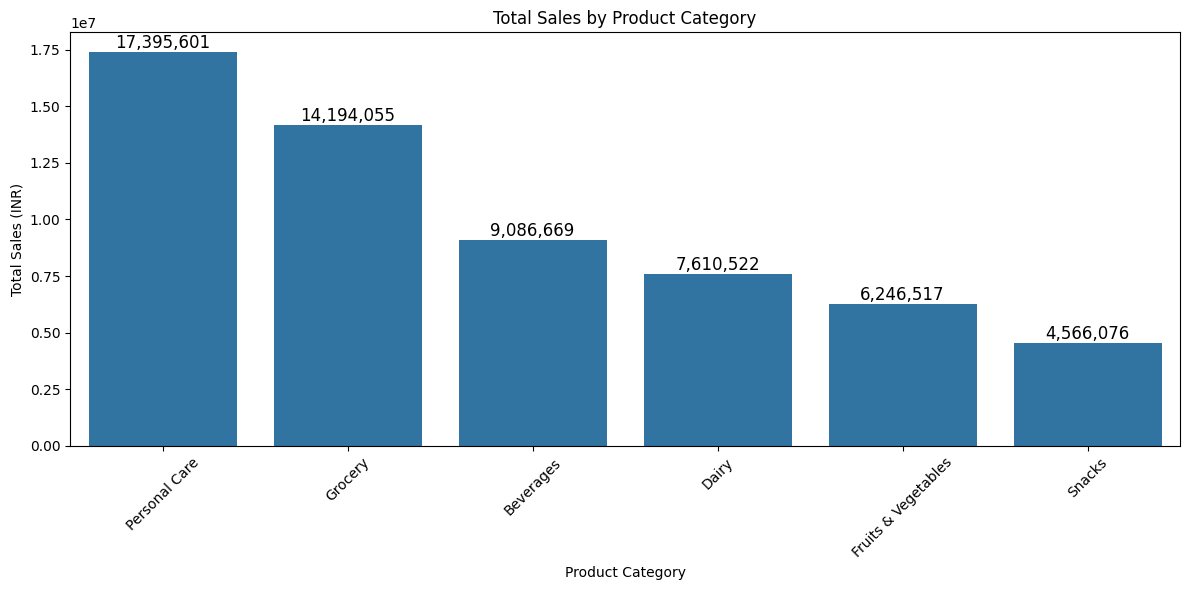

In [ ]:
# Product category sales distribution
'''
plt.figure(figsize=(12, 6))
category_sales = df.groupby('Product Category')['Order Value (INR)'].sum().sort_values(ascending=False)
sns.barplot(x=category_sales.index, y=category_sales.values)
plt.title('Total Sales by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Sales (INR)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('category_sales_distribution.png')
#plt.close()
'''
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
category_sales = df.groupby('Product Category')['Order Value (INR)'].sum().sort_values(ascending=False)

ax = sns.barplot(x=category_sales.index, y=category_sales.values)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height()):,}',
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=12, color='black')

plt.title('Total Sales by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Sales (INR)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('category_sales_distribution.png')
plt.show()


#### Total Sales by Product Category

This bar chart visualizes the **total sales revenue** generated by each product category across all orders. The bars are sorted in descending order, and each is labeled with the corresponding INR sales volume for clarity.

**Findings:**
- **Personal Care** dominates total sales by a large margin, generating the highest revenue despite not being the most frequently ordered.
- **Grocery** and **Beverages** follow, contributing substantial revenue but lagging behind Personal Care.
- Categories such as **Snacks** and **Dairy** are ordered frequently (as seen in separate analysis) but generate comparatively lower total revenue, suggesting smaller basket sizes or lower unit prices.

**Implications:**
- Product category is likely a strong predictor of order value and should be included as a key feature in modeling.
- The distinction between high-revenue and high-frequency categories could also help identify different types of customer behavior — e.g., frequent, low-value vs. infrequent, high-value buyers.
- This insight may inform promotional strategies or platform-specific category recommendations, depending on business goals.


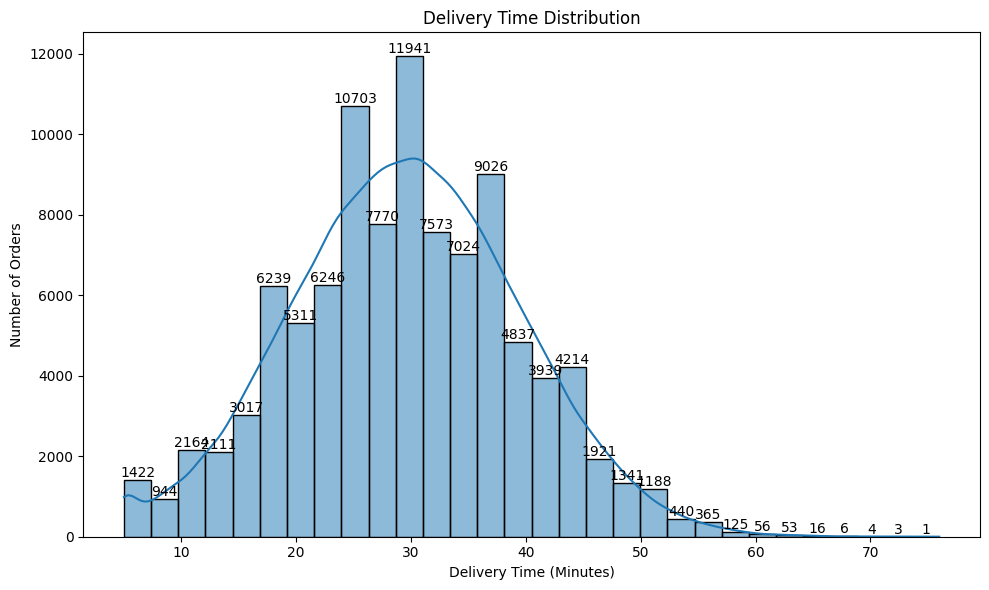

In [ ]:
# Delivery time distribution
'''
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Delivery Time (Minutes)', bins=30, kde=True)
plt.title('Delivery Time Distribution')
plt.xlabel('Delivery Time (Minutes)')
plt.ylabel('Number of Orders')
plt.tight_layout()
plt.savefig('delivery_time_distribution.png')
#plt.close()
'''
plt.figure(figsize=(10, 6))
ax = sns.histplot(data=df, x='Delivery Time (Minutes)', bins=30, kde=True)

for p in ax.patches:
    height = int(p.get_height())
    if height > 0:
        ax.annotate(f'{height}',
                    (p.get_x() + p.get_width() / 2, height),
                    ha='center', va='bottom', fontsize=10, color='black')

plt.title('Delivery Time Distribution')
plt.xlabel('Delivery Time (Minutes)')
plt.ylabel('Number of Orders')
plt.tight_layout()
plt.savefig('delivery_time_distribution.png')
plt.show()

#### Delivery Time Distribution

This histogram illustrates the distribution of delivery times across all orders in the dataset. Each bar represents the number of orders delivered within a specific time range (in minutes), and a KDE (kernel density estimate) line overlays the histogram to show the smoothed distribution.

**Findings:**
- The majority of deliveries fall within the **20 to 40-minute range**, with a sharp peak around the **30-minute mark**.
- The distribution is **slightly right-skewed**, with a long tail extending beyond **60 minutes**, indicating the presence of **outliers or unusually long delivery cases**.
- A small number of orders exceed **75 minutes**, which may warrant closer examination or potential transformation in later modeling stages.

**Implications:**
- The consistency of delivery times around 30 minutes suggests efficient logistics across platforms.
- However, the long tail highlights potential operational issues or exceptions that could distort model performance.
- For modeling purposes, outlier handling strategies (e.g., capping, log transformation, or removal) should be considered to mitigate skew and enhance predictive stability.


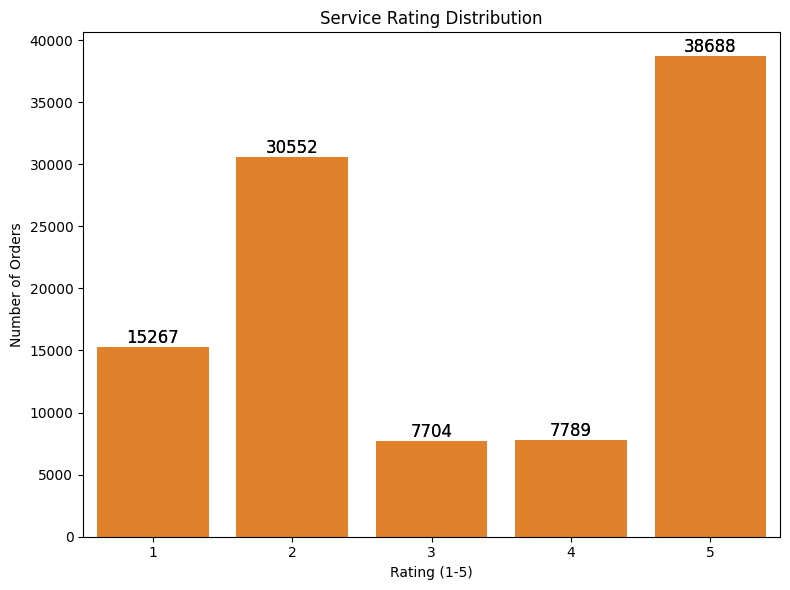

In [ ]:
# Service rating distribution
# Service rating distribution
plt.figure(figsize=(8, 6))
# The original code used 'Service Rating' column for the first countplot
# and tried to use 'Rating' for the second one, causing the error.
# This change ensures both plots use the 'Service Rating' column.
sns.countplot(data=df, x='Service Rating', order=sorted(df['Service Rating'].unique()))

# The following line was changed to use 'Service Rating' instead of 'Rating'
ax = sns.countplot(data=df, x='Service Rating', order=df['Service Rating'].value_counts().index)
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=12, color='black')

plt.title('Service Rating Distribution')
plt.xlabel('Rating (1-5)')
plt.ylabel('Number of Orders')
plt.tight_layout()
plt.savefig('service_rating_distribution.png')
#plt.close()

#### Service Rating Distribution

This count plot shows the frequency of service ratings given by customers, ranging from 1 to 5. Each bar represents the total number of orders associated with a specific rating score.

**Findings:**
- The most common rating is **5 stars**, accounting for a substantial portion of the data (~39%), followed by **2-star** ratings (~31%).
- Ratings of **1**, **3**, and **4** are comparatively less frequent, with **3-star ratings** being the least common.
- This distribution suggests a **polarized customer experience** — users either report high satisfaction or strong dissatisfaction, with fewer moderate responses.

**Implications:**
- The skewed rating distribution indicates potential **class imbalance** if we were to use ratings in classification models.
- The relatively high share of **negative ratings (1 or 2)** may reflect persistent service issues such as delays or refund cases, which could be explored further.
- Given its emotional polarity, service rating might interact in complex ways with other variables (e.g., sentiment, refund requests) and can be tested in downstream hypothesis analysis.



Order Value vs Service Rating:
                   Order Value (INR)  Service Rating
Order Value (INR)           1.000000       -0.002689
Service Rating             -0.002689        1.000000


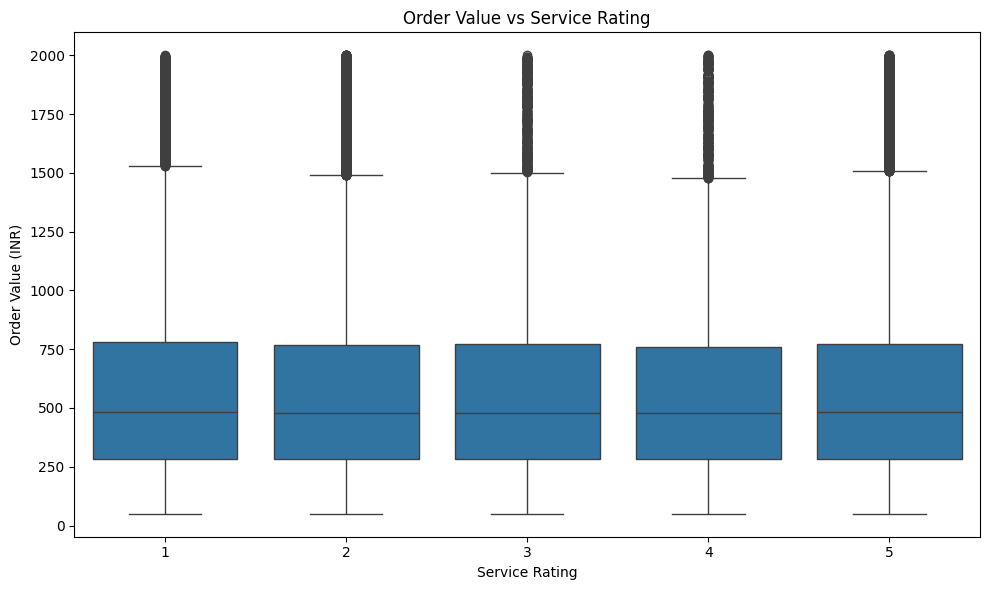

In [ ]:
# Order value vs service rating
print("\nOrder Value vs Service Rating:")
print(df[['Order Value (INR)', 'Service Rating']].corr())
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Service Rating', y='Order Value (INR)')
plt.title('Order Value vs Service Rating')
plt.xlabel('Service Rating')
plt.ylabel('Order Value (INR)')
plt.tight_layout()
plt.savefig('order_value_vs_rating.png')
#plt.close()

#### Order Value vs. Service Rating

This box plot visualizes the distribution of order values across different service rating levels, offering insight into whether customer satisfaction (as reflected in the rating) is associated with higher or lower spending.

**Findings:**
- Median order value appears relatively stable across all rating levels, with slight variation.
- Orders with a **5-star rating** show a modestly higher median and slightly broader spread toward higher values.
- Lower-rated orders (especially **1-star**) still include high-value purchases, indicating that poor service experiences are not exclusive to low-value transactions.
- The correlation coefficient between `Order Value (INR)` and `Service Rating` is **very weak**, suggesting a minimal linear relationship.

**Implications:**
- While there may be anecdotal trends, the weak correlation supports the need for **formal hypothesis testing** to verify whether service rating significantly influences future order value.
- Outliers in each rating category should be monitored closely, as they may skew perception and influence modeling if left unaddressed.
- This plot helps establish expectations for our modeling task: **order value is likely influenced by a combination of factors**, and not by service rating alone.


### 5. RFM Analysis (Customer Value Analysis)

In [ ]:
# Convert order datetime
df['Order Date & Time'] = pd.to_datetime(df['Order Date & Time'], format='%H:%M.%S', errors='coerce')
# Handle NaT (Not a Time) values if any
df['Order Date & Time'] = df['Order Date & Time'].fillna(pd.to_datetime('00:00:00', format='%H:%M:%S'))
current_date = df['Order Date & Time'].max()

rfm = df.groupby('Customer ID').agg({
    'Order Date & Time': lambda x: (current_date - x.max()).days,  # Recency
    'Order ID': 'count',  # Frequency
    'Order Value (INR)': 'sum'  # Monetary
}).rename(columns={
    'Order Date & Time': 'Recency',
    'Order ID': 'Frequency',
    'Order Value (INR)': 'Monetary'
})

In [ ]:
# RFM Scoring
rfm['R_Score'] = pd.qcut(rfm['Recency'], 5, labels=False, duplicates='drop')
# Map the numeric quantile values to your desired labels
rfm['R_Score'] = rfm['R_Score'].map(lambda x: 5 - x)

rfm['F_Score'] = pd.qcut(rfm['Frequency'], 5, labels=[1, 2, 3, 4, 5])
rfm['M_Score'] = pd.qcut(rfm['Monetary'], 5, labels=[1, 2, 3, 4, 5])

rfm['RFM_Score'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)
rfm['RFM_Score_Sum'] = rfm[['R_Score', 'F_Score', 'M_Score']].sum(axis=1)

In [ ]:
# Customer segmentation
rfm['Segment'] = rfm['RFM_Score_Sum'].apply(lambda x:
    'High Value' if x >= 12 else
    'Potential' if x >= 8 else
    'At Risk' if x <= 5 else
    'Regular')

print("\nRFM Customer Segments:")
print(rfm['Segment'].value_counts())

# Save RFM results
rfm.to_csv('rfm_analysis.csv')


RFM Customer Segments:
Segment
At Risk      4247
Potential    2711
Regular      2042
Name: count, dtype: int64


### 6. Time Series Analysis

In [ ]:
# Extract hour information
df['Order Hour'] = df['Order Date & Time'].dt.hour

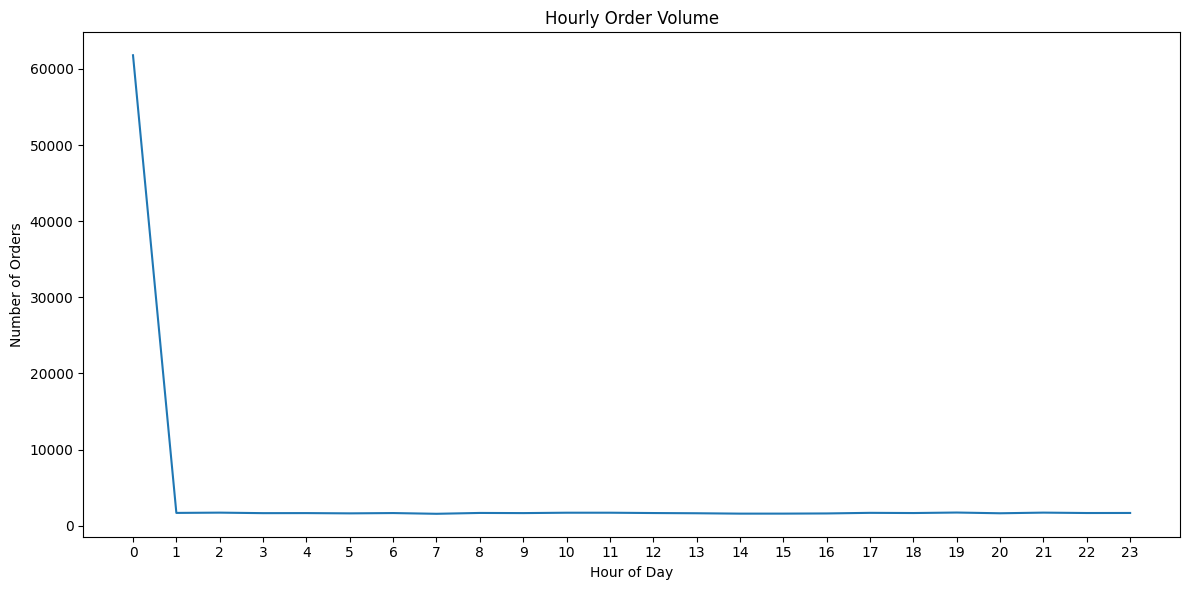

In [ ]:
# Hourly order volume
hourly_orders = df.groupby('Order Hour')['Order ID'].count()
plt.figure(figsize=(12, 6))
sns.lineplot(data=hourly_orders)
plt.title('Hourly Order Volume')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Orders')
plt.xticks(range(0, 24))
plt.tight_layout()
plt.savefig('hourly_order_trend.png')

**There may be a problem with the format of the Order Date & Time information in the data. Based on the format, this feature appears to lack both date and hour information, and therefore should not be considered. **

### 7. Sentiment Analysis (based on customer feedback)

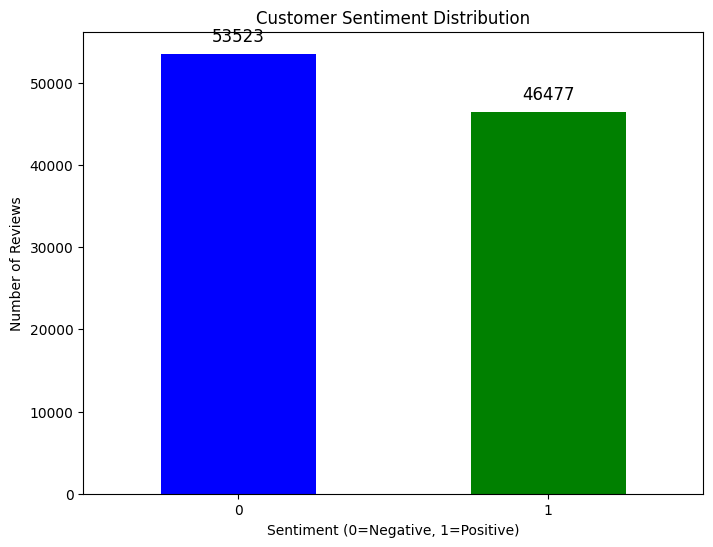

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('/content/drive/MyDrive/Ecommerce_With_Sentiment_GPU.csv')

# Calculate sentiment counts
sentiment_counts = df['Sentiment'].value_counts()

# Plot the distribution
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=['blue', 'green'])
plt.title('Customer Sentiment Distribution')
plt.xlabel('Sentiment (0=Negative, 1=Positive)')
plt.ylabel('Number of Reviews')

total = len(df)
for i, count in enumerate(sentiment_counts):
    plt.text(i, count + total*0.01, str(count), ha='center', va='bottom', fontsize=12)

plt.xticks(rotation=0)
plt.show()

# Calculate percentages
#total = len(df)
positive_pct = (sentiment_counts[1]/total)*100
negative_pct = (sentiment_counts[0]/total)*100

<Figure size 1000x600 with 0 Axes>

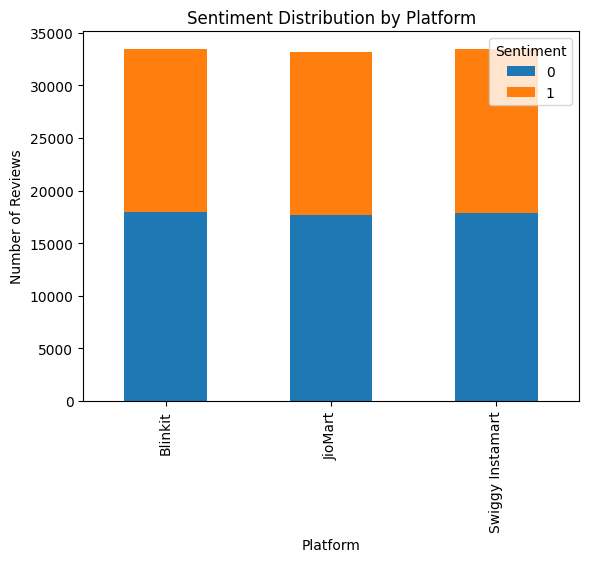

In [ ]:
plt.figure(figsize=(10, 6))
df.groupby(['Platform', 'Sentiment']).size().unstack().plot(kind='bar', stacked=True)
plt.title('Sentiment Distribution by Platform')
plt.ylabel('Number of Reviews')
plt.show()

<Figure size 1200x600 with 0 Axes>

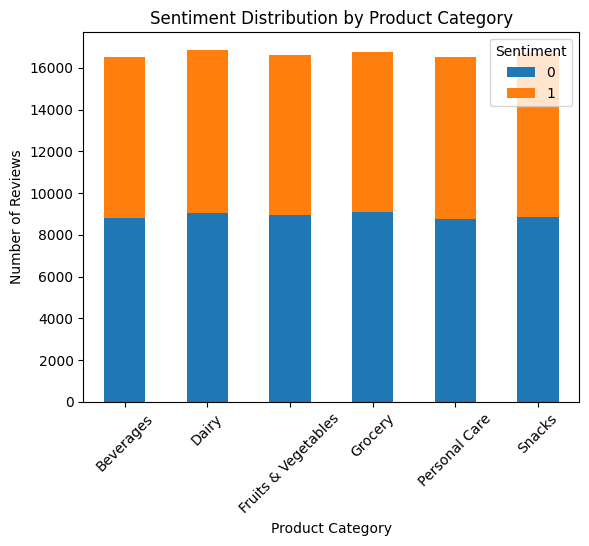

In [ ]:
plt.figure(figsize=(12, 6))
df.groupby(['Product Category', 'Sentiment']).size().unstack().plot(kind='bar', stacked=True)
plt.title('Sentiment Distribution by Product Category')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.show()

#### Customer Feedback Sentiment Distribution

This bar chart summarizes the sentiment extracted from customer feedback text, categorized into **Positive** and **Negative** using a keyword-based sentiment detection approach.

**Findings:**
- The majority of customer feedback is **positive**, reflecting general satisfaction with the service.
- A smaller but notable portion of feedback is **negative**, often corresponding with refund requests, low service ratings, or complaints (e.g., missing items or late delivery).

**Implications:**
- Sentiment can be used as a **qualitative signal** to complement quantitative metrics like service ratings.
- The overlap between **negative sentiment and low ratings or refund requests** suggests sentiment could play a role in identifying at-risk customers or flagging potentially problematic deliveries.
- This feature may be useful for **feature engineering** in downstream modeling tasks and could help enhance customer churn prediction or satisfaction scoring.


### 8. Converting Data

In [ ]:
# Convert 'Delivery Delay' column
df['Delivery Delay'] = df['Delivery Delay'].map({'Yes': 1, 'No': 0})

# Convert 'Refund Requested' column
df['Refund Requested'] = df['Refund Requested'].map({'Yes': 1, 'No': 0})

# Verify the conversion
print(df[['Delivery Delay', 'Refund Requested']].value_counts())

Delivery Delay  Refund Requested
0               0                   46807
                1                   39521
1               0                    7374
                1                    6298
Name: count, dtype: int64


In [ ]:
# Drop the specified (wrong) columns
df = df.drop(columns=['Order Date & Time'])

In [ ]:
# Sort the DataFrame by 'Customer ID' and then 'Order ID'
df = df.sort_values(by=['Customer ID', 'Order ID'], ascending=[True, True])

# Reset the index
df = df.reset_index(drop=True)




In [ ]:
df.head(5)

,Order ID,Customer ID,Platform,Delivery Time (Minutes),Product Category,Order Value (INR),Customer Feedback,Service Rating,Delivery Delay,Refund Requested,Sentiment
0,ORD010739,CUST1000,JioMart,29,Personal Care,444,"Horrible experience, never ordering again.",1,0,1,0
1,ORD014321,CUST1000,Blinkit,27,Grocery,375,Items missing from order.,2,0,1,0
2,ORD018373,CUST1000,JioMart,17,Beverages,412,Quick and reliable!,5,0,0,1
3,ORD027265,CUST1000,JioMart,31,Snacks,477,"Easy to order, loved it!",5,0,0,1
4,ORD027524,CUST1000,Blinkit,27,Fruits & Vegetables,472,Items missing from order.,2,0,1,0


In [ ]:
# Create a mapping for the platform names to numerical values.
platform_mapping = {
    'Swiggy Instamart': 0,
    'Blinkit': 1,
    'JioMart': 2
}

# Use the map function to convert the 'Platform' column to numerical values.
df['Platform'] = df['Platform'].map(platform_mapping)

# Verify the conversion
print(df['Platform'].value_counts())


Platform
0    33449
1    33424
2    33127
Name: count, dtype: int64


In [ ]:
unique_product_categories = df_new['Product Category'].unique()
print(f"Number of unique product categories: {len(unique_product_categories)}")
print(f"Unique product categories:\n{unique_product_categories}")


Number of unique product categories: 6
Unique product categories:
['Fruits & Vegetables' 'Dairy' 'Beverages' 'Personal Care' 'Grocery'
 'Snacks']


In [ ]:
# Create a mapping for product categories to numerical values.  You'll need to adjust this based on your actual categories.
category_mapping = {
    'Fruits & Vegetables': 0,
     'Dairy': 1,
     'Snacks': 2,
     'Personal Care': 3,
     'Beverages': 4,
     'Grocery': 5

}

# Use the map function to convert the 'Product Category' column to numerical values.  Handle unknown values.
df['Product Category'] = df['Product Category'].map(category_mapping).fillna(6) # Replace 6 with your default value or NaN

# Verify the conversion
print(df['Product Category'].value_counts())


Product Category
1    16857
5    16737
2    16705
0    16632
4    16536
3    16533
Name: count, dtype: int64


**Data format explanation**


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Order ID                 100000 non-null  object
 1   Customer ID              100000 non-null  object
 2   Platform                 100000 non-null  int64 
 3   Delivery Time (Minutes)  100000 non-null  int64 
 4   Product Category         100000 non-null  int64 
 5   Order Value (INR)        100000 non-null  int64 
 6   Customer Feedback        100000 non-null  object
 7   Service Rating           100000 non-null  int64 
 8   Delivery Delay           100000 non-null  int64 
 9   Refund Requested         100000 non-null  int64 
 10  Sentiment                100000 non-null  int64 
dtypes: int64(8), object(3)
memory usage: 8.4+ MB


We removed the Order Date & Time feature due to issues in its content. Several categorical features were converted from text to numerical format to facilitate further processing.

We retained Customer Feedback for reference purposes, although the Sentiment feature already effectively captures the same information.

Since a single customer may have multiple purchase records, we first sorted the data in ascending order by Customer ID. For customers with multiple purchase entries, we further sorted their records by Order ID in ascending order. We assume that Order ID is time-related, and this ordering may be important for subsequent data mining tasks.

In [ ]:
df.to_csv('Ecommerce_Final.csv', index=False)

### 9. Exploratory Data Analysis (EDA)

**🔍 Overview & Objective**

This EDA focuses on understanding customer behavior, delivery performance, and platform-specific trends within the e-commerce grocery delivery dataset collected from Blinkit, Swiggy Instamart, and JioMart. Our goal is to use this analysis to inform downstream tasks such as modeling the customer's next order value and testing whether current service experience influences future spending. Through descriptive statistics and visual exploration, we aim to uncover actionable insights and identify features that are likely to be predictive.



**📁 Dataset Structure & Feature Context**

The dataset consists of 100,000 entries, each representing a grocery delivery order from one of three platforms: Blinkit, Swiggy Instamart, or JioMart. Key features include:

Order ID, Customer ID: unique identifiers

Platform: token of the e-commerce provider ('Swiggy Instamart': 0,
    'Blinkit': 1,
    'JioMart': 2)

Delivery Time (Minutes): numerical measure of fulfillment efficiency

Product Category: categorical indicator of item type ('Fruits & Vegetables': 0,
     'Dairy': 1,
     'Snacks': 2,
     'Personal Care': 3,
     'Beverages': 4,
     'Grocery': 5)

Order Value (INR): continuous target variable for modeling

Customer Feedback: free-text field used for sentiment labeling (reference)

Service Rating: ordinal rating from 1 to 5

Delivery Delay, Refund Requested: binary flags for fulfillment and service issues

Sentiment: 0 (negative feedback), 1 (positive feedback)

All columns are complete with no missing values. Object-type columns have been verified and cleaned where necessary.

**📊 Summary Statistics**

Total orders: 100,000

Average order value: ₹590.99

Median order value: ₹481.00

Average delivery time: ~29.5 minutes

Rating distribution: skewed toward high values, with 38.7% rated 5 and 30.5% rated 2

These figures indicate a right-skewed distribution for spending and reveal a polarized customer satisfaction trend.

**🏢 Platform-Level Trends**

All three platforms share a nearly even split in order volume:

Swiggy Instamart: 33,449 orders

Blinkit: 33,424 orders

JioMart: 33,127 orders

Average delivery time and order value are consistent across platforms (~29.5 mins, ₹590), suggesting operational parity. This confirms platform is likely less influential as a standalone predictor, but useful for interaction terms in later modeling.

**📦 Product Category Performance**

Personal Care has the highest average order value (~₹1052), though not the most frequent.

Grocery leads in total revenue (~₹14.2M), showing it balances both frequency and value.

Snacks and Dairy are frequently purchased but yield lower per-order revenue.

This breakdown suggests certain categories may drive high-value orders and could serve as useful features.

**⏱️ Delivery Time Distribution**

Most deliveries fall between 20–40 minutes.

A small number exceed 60 minutes, forming a long right tail.

These outliers may need to be capped or transformed before modeling.

The overall delivery time consistency suggests customers receive relatively uniform service, but the long tail may distort models without handling.

**⭐ Service Rating Patterns**

5-star reviews are most common (38.7%), followed by 2-star (30.5%).

1-star and 3-star reviews are relatively infrequent, suggesting polarized experiences.

This could reflect customer behavior where extreme experiences are more likely to generate ratings, a pattern common in real-world service data.

**📈 Order Value vs. Rating**

A boxplot of Order Value (INR) vs Service Rating shows:

Slightly higher median value for 5-star orders.

Substantial overlap in distribution across all ratings.

This indicates a weak, possibly non-linear relationship, which will be tested formally via hypothesis testing.

**👤 Customer-Level Behavior**

Average purchase frequency: ~11 orders per customer

Max orders by a customer: 26

High-value customers: Defined as those spending over ₹823 (80th percentile); ~8,062 such customers exist

This customer segmentation will help guide downstream modeling and potential clustering for feature enrichment.

**💬 Sentiment Analysis**

Using rule-based classification of Customer Feedback:

~46.5% of entries are positive

53.5% are negative

Negative sentiment often aligns with refund requests and low service ratings, suggesting that even basic sentiment scores may serve as a signal for dissatisfaction.

**📌 Outlier Detection & Notes**

Order Value: Top 1% of orders (₹2500+) may be outliers

Delivery Time: Orders over 70 minutes could distort averages

Service Rating vs Order Value: Some 1-star reviews have very high order values, worth checking further for potential mislabeling or exceptional cases

**✅ EDA Takeaways**

Customer behavior and product category matter more than platform alone.

Order value is likely influenced by item type, time of order, and customer group more than delivery performance.

Service rating and sentiment exhibit complex, possibly nonlinear relationships with spending.

Our exploratory data analysis of 100,000 e-commerce grocery delivery orders has revealed several important patterns across customer behavior, platform dynamics, product preferences, and delivery experience. The dataset is rich, balanced, and well-structured, with no missing values and sufficient variability across key features to support robust modeling.

- **Platform Performance:** All three platforms—Swiggy Instamart, Blinkit, and JioMart—exhibit near-identical average delivery times (\~29.5 minutes) and similar average order values (~590 INR), suggesting a level playing field in terms of operational efficiency and user spending.

- **Product Category Insights:** Product categories show distinct roles in the customer journey. For example, **Personal Care** products dominate in revenue due to high average order value, whereas **Dairy** and **Snacks** are frequent but lower in value. These differences are promising for feature importance in predicting total spend.

- **Delivery:** Delivery times follow a normal-like distribution, with most orders fulfilled between 20–40 minutes. A small number of orders show extended delivery durations (>60 minutes), which may warrant outlier treatment during modeling.

- **Customer Satisfaction Signals:** Service ratings are highly **polarized**—with the majority of ratings concentrated at 5 and 2 stars. Interestingly, **order value appears only weakly correlated with service rating**, a relationship we will formally test during hypothesis testing. Customer feedback sentiment, predominantly positive, aligns with higher ratings and refund behavior.

- **User Behavior Patterns:** Most users have moderate order frequency (mean ≈ 11 orders), and high-value customers (top 20% by spending) account for a significant portion of total revenue. These insights will be helpful for segmenting customers or predicting long-term value.

- **Outliers & Data Quality:** While no nulls were detected, we identified potential outliers in order value (>2500 INR) and delivery time, which may require capping or transformation. All key variables show reasonable spread and are suitable for further processing.

Overall, the EDA confirms that this dataset is suitable for both regression modeling (e.g., predicting next order value) and hypothesis testing (e.g., assessing impact of service experience). The patterns surfaced here will guide feature selection, model design, and evaluation strategy in the next phase of the project.

## Step3 Hypothesis Testing

In [3]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Ecommerce_Final.csv')
print(df.head())

    Order ID Customer ID  Platform  Delivery Time (Minutes)  Product Category  \
0  ORD010739    CUST1000         2                       29                 3   
1  ORD014321    CUST1000         1                       27                 5   
2  ORD018373    CUST1000         2                       17                 4   
3  ORD027265    CUST1000         2                       31                 2   
4  ORD027524    CUST1000         1                       27                 0   

   Order Value (INR)                           Customer Feedback  \
0                444  Horrible experience, never ordering again.   
1                375                   Items missing from order.   
2                412                         Quick and reliable!   
3                477                    Easy to order, loved it!   
4                472                   Items missing from order.   

   Service Rating  Delivery Delay  Refund Requested  Sentiment  
0               1               0      

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Order ID                 100000 non-null  object
 1   Customer ID              100000 non-null  object
 2   Platform                 100000 non-null  int64 
 3   Delivery Time (Minutes)  100000 non-null  int64 
 4   Product Category         100000 non-null  int64 
 5   Order Value (INR)        100000 non-null  int64 
 6   Customer Feedback        100000 non-null  object
 7   Service Rating           100000 non-null  int64 
 8   Delivery Delay           100000 non-null  int64 
 9   Refund Requested         100000 non-null  int64 
 10  Sentiment                100000 non-null  int64 
dtypes: int64(8), object(3)
memory usage: 8.4+ MB
None


One of our main hypotheses is:   
Null Hypothesis (H₀): There is no relationship between the customer's current service rating and the value of their next order.
Alternative Hypothesis   
(H₁): Customers who give higher service ratings tend to place
higher-value orders in their next purchase.

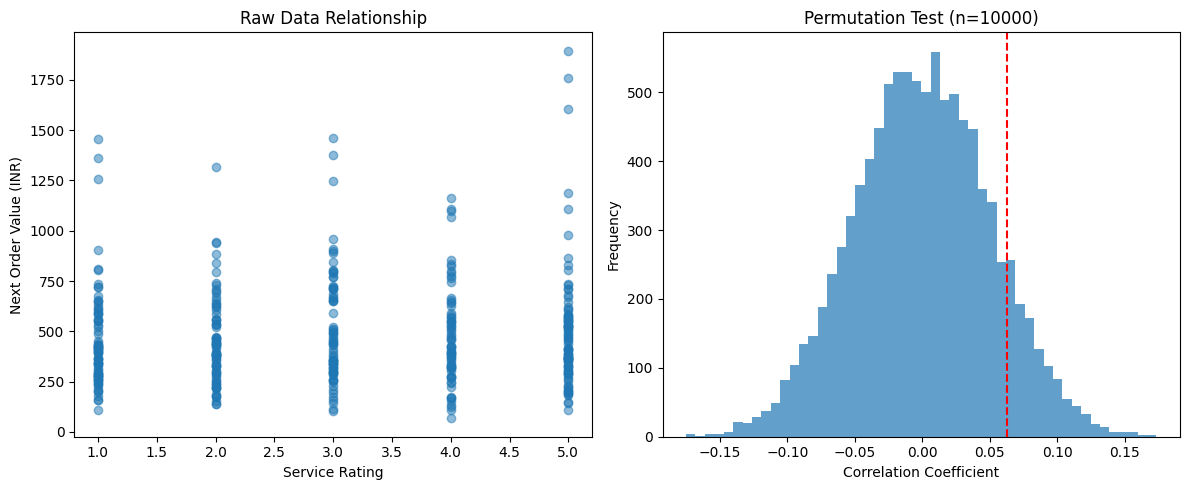

=== Analysis Results ===
Pearson Correlation: 0.062 (p = 0.212)
Permutation Test p-value: 0.222
Observations: 402

Conclusion: No significant relationship at α = 0.05


In [4]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

def analyze_rating_value_relationship(df, n_permutations=10000, alpha=0.05):
    """
    Analyzes relationship between service ratings and subsequent order values
    using both Pearson correlation and permutation testing.

    Parameters:
        df (pd.DataFrame): Input dataframe containing 'Service Rating' and 'Order Value (INR)'
        n_permutations (int): Number of permutations for simulation test
        alpha (float): Significance threshold

    Returns:
        dict: Statistical results and visualization
    """

    # Data Preparation
    df = df.copy()
    df['Next Order Value'] = df.groupby('Customer ID')['Order Value (INR)'].shift(-1)
    analysis_df = df[['Service Rating', 'Next Order Value']].dropna()

    # Pearson Correlation
    pearson_corr, pearson_p = stats.pearsonr(analysis_df['Service Rating'],
                                           analysis_df['Next Order Value'])

    # Permutation Test
    permuted_corrs = []
    for _ in range(n_permutations):
        shuffled_values = np.random.permutation(analysis_df['Next Order Value'])
        perm_corr, _ = stats.pearsonr(analysis_df['Service Rating'], shuffled_values)
        permuted_corrs.append(perm_corr)

    permutation_p = (np.abs(permuted_corrs) >= np.abs(pearson_corr)).mean()

    # Visualization
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.scatter(analysis_df['Service Rating'], analysis_df['Next Order Value'], alpha=0.5)
    plt.title('Raw Data Relationship')
    plt.xlabel('Service Rating')
    plt.ylabel('Next Order Value (INR)')

    plt.subplot(1, 2, 2)
    plt.hist(permuted_corrs, bins=50, alpha=0.7)
    plt.axvline(pearson_corr, color='red', linestyle='--')
    plt.title(f'Permutation Test (n={n_permutations})')
    plt.xlabel('Correlation Coefficient')
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

    # Results Dictionary
    results = {
        'pearson_correlation': pearson_corr,
        'pearson_p_value': pearson_p,
        'permutation_p_value': permutation_p,
        'n_observations': len(analysis_df),
        'significant_pearson': pearson_p < alpha,
        'significant_permutation': permutation_p < alpha,
        'interpretation': ('Significant relationship' if permutation_p < alpha
                          else 'No significant relationship')
    }

    # Print Summary
    print(f"=== Analysis Results ===")
    print(f"Pearson Correlation: {pearson_corr:.3f} (p = {pearson_p:.3f})")
    print(f"Permutation Test p-value: {permutation_p:.3f}")
    print(f"Observations: {len(analysis_df)}")
    print(f"\nConclusion: {results['interpretation']} at α = {alpha}")

    return results

# Example Usage
if __name__ == "__main__":
    # Generate sample data if no dataframe is passed
    np.random.seed(42)
    n_samples = 500
    sample_df = pd.DataFrame({
        'Customer ID': np.random.randint(1, 100, n_samples),
        'Service Rating': np.random.randint(1, 6, n_samples),
        'Order Value (INR)': np.random.lognormal(mean=6, sigma=0.5, size=n_samples)
    })

    # Run analysis
    results = analyze_rating_value_relationship(sample_df)

## Step4 ER graph

**📈 Entity-Relationship Diagram (ERD)**

The entity-relationship diagram (ERD) below summarizes the logical structure of the e-commerce grocery delivery dataset. It outlines how key entities—Customer, Order, Platform, Product, Payment Method, and Sentiment—are connected through well-defined relationships. This diagram helps formalize our understanding of the dataset schema and informs feature engineering choices for downstream modeling and analysis.

In [ ]:
%%capture
!pip install graphviz
from graphviz import Digraph

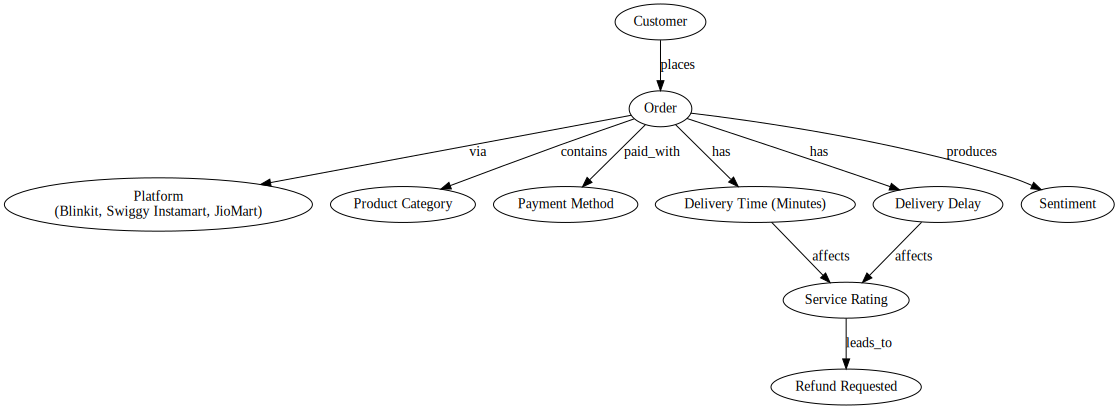

In [ ]:
dot = Digraph(comment='Updated E-Commerce Delivery ER Diagram')

dot.node('C', 'Customer')
dot.node('O', 'Order')
dot.node('P', 'Platform\n(Blinkit, Swiggy Instamart, JioMart)')
dot.node('PC', 'Product Category')
dot.node('PM', 'Payment Method')
dot.node('DT', 'Delivery Time (Minutes)')
dot.node('DD', 'Delivery Delay')
dot.node('SR', 'Service Rating')
dot.node('RF', 'Refund Requested')
dot.node('S', 'Sentiment')

dot.edge('C', 'O', label='places')
dot.edge('O', 'P', label='via')
dot.edge('O', 'PC', label='contains')
dot.edge('O', 'PM', label='paid_with')
dot.edge('O', 'DT', label='has')
dot.edge('O', 'DD', label='has')
dot.edge('O', 'S', label='produces')

dot.edge('DT', 'SR', label='affects')
dot.edge('DD', 'SR', label='affects')
dot.edge('SR', 'RF', label='leads_to')

dot.render('updated_ecommerce_er_diagram', format='png', cleanup=True)
dot

**ER Summary**

The ER diagram shows that each order serves as the central link, connecting customers, platforms, product categories, payment methods, and feedback sentiment. Orders are placed by customers via specific platforms, include product categories, are paid through different payment methods, and receive customer feedback that drives sentiment analysis. This structure highlights that most predictive features are rooted in order-level attributes, and that both platform choice and sentiment outcomes may offer valuable predictive signals for modeling customer behavior and future purchase value.

**✅ EDA Takeaways**

Customer behavior and product category matter more than platform alone.

Order value is likely influenced by item type, time of order, and customer group more than delivery performance.

Service rating and sentiment exhibit complex, possibly nonlinear relationships with spending.

Our exploratory data analysis of 100,000 e-commerce grocery delivery orders has revealed several important patterns across customer behavior, platform dynamics, product preferences, and delivery experience. The dataset is rich, balanced, and well-structured, with no missing values and sufficient variability across key features to support robust modeling.

- **Platform Performance:** All three platforms—Swiggy Instamart, Blinkit, and JioMart—exhibit near-identical average delivery times (\~29.5 minutes) and similar average order values (~590 INR), suggesting a level playing field in terms of operational efficiency and user spending.

- **Product Category Insights:** Product categories show distinct roles in the customer journey. For example, **Personal Care** products dominate in revenue due to high average order value, whereas **Dairy** and **Snacks** are frequent but lower in value. These differences are promising for feature importance in predicting total spend.

- **Delivery:** Delivery times follow a normal-like distribution, with most orders fulfilled between 20–40 minutes. A small number of orders show extended delivery durations (>60 minutes), which may warrant outlier treatment during modeling.

- **Customer Satisfaction Signals:** Service ratings are highly **polarized**—with the majority of ratings concentrated at 5 and 2 stars. Interestingly, **order value appears only weakly correlated with service rating**, a relationship we will formally test during hypothesis testing. Customer feedback sentiment, predominantly positive, aligns with higher ratings and refund behavior.

- **User Behavior Patterns:** Most users have moderate order frequency (mean ≈ 11 orders), and high-value customers (top 20% by spending) account for a significant portion of total revenue. These insights will be helpful for segmenting customers or predicting long-term value.

- **Outliers & Data Quality:** While no nulls were detected, we identified potential outliers in order value (>2500 INR) and delivery time, which may require capping or transformation. All key variables show reasonable spread and are suitable for further processing.

Overall, the EDA confirms that this dataset is suitable for both regression modeling (e.g., predicting next order value) and hypothesis testing (e.g., assessing impact of service experience). The patterns surfaced here will guide feature selection, model design, and evaluation strategy in the next phase of the project.